In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# read the data from csv files\
Sleepdata = pd.read_csv("Sleepdata-Extrapolated-Cleaned-Latest.csv")
# show the first few rows of the dataframe
(Sleepdata.head())
#np.shape(Sleepdata)

,Time,HR,HRV,BR,sleep_level
0,37:33.2,50.0,63.0,14.29,0.0
1,37:33.7,50.0,63.0,14.29,0.0
2,37:34.2,50.0,63.0,14.29,0.0
3,37:34.7,50.0,63.0,14.29,0.0
4,37:35.2,50.0,63.0,14.29,0.0



# ANN for Sleep data classification using HR, HRV and BR as inputs


In [8]:

# Import necessary libraries for ANN
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder



## Loading the dataset


In [9]:
data = pd.read_csv("Sleepdata-Extrapolated-Cleaned-Latest.csv")
# Show the first few rows of the dataframe
(data.head())


,Time,HR,HRV,BR,sleep_level
0,37:33.2,50.0,63.0,14.29,0.0
1,37:33.7,50.0,63.0,14.29,0.0
2,37:34.2,50.0,63.0,14.29,0.0
3,37:34.7,50.0,63.0,14.29,0.0
4,37:35.2,50.0,63.0,14.29,0.0


In [10]:
# CHECK FOR MISSING VALUES
print("Missing values in each column:")
print(data.isnull().sum())
# Drop rows with missing values
data.dropna(inplace=True)

# # SAVE THE DATA
# data.to_csv("Sleepdata-Extrapolated-Cleaned.csv", index=False)



Missing values in each column:
Time           0
HR             0
HRV            0
BR             0
sleep_level    0
dtype: int64


# Data Pre-processing


In [11]:

# Check if 'sleep_level' is categorical or numerical
if data['sleep_level'].dtype == 'object':
    # Encode categorical labels to integers
    label_encoder = LabelEncoder()
    data['sleep_level'] = label_encoder.fit_transform(data['sleep_level'])
# Define input features and target variable
y = data[['sleep_level']].values  # Target variable (Sleep Level)
X = data[['HR', 'HRV', 'BR']].values  # Input features (Heart Rate and value HRV)




# Split the dataset into training and testing sets


In [12]:
# Split the dataset into training, evaluation and  testing sets  80-10-10
from sklearn.model_selection import train_test_split
# Split the dataset into training (80%) and temporary (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary set into validation (10%) and testing (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the features and Normalize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


# Print the shapes of the datasets to verify the splits
np.shape(X_train), np.shape(X_val), np.shape(X_test), np.shape(y_train), np.shape(y_val), np.shape(y_test)


((56924, 3), (7116, 3), (7116, 3), (56924, 1), (7116, 1), (7116, 1))


# Ensure y is a 1D array for classification


In [13]:

# One-hot encode y if there are more than 2 classes
if len(np.unique(y)) > 2:  # Multi-class classification
    encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output instead of sparse
    y_train = encoder.fit_transform(y_train.reshape(-1, 1))
    y_val = encoder.transform(y_val.reshape(-1, 1))
    y_test = encoder.transform(y_test.reshape(-1, 1))
else:
    y_train = y_train.ravel()
    y_val = y_val.ravel()
    y_test = y_test.ravel()



# Build the ANN model


Test Accuracy: 0.8451377178189995
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       0.86      0.93      0.89      3675
           2       0.92      0.78      0.84      2220
           3       0.92      0.78      0.84      1000

   micro avg       0.89      0.86      0.88      7116
   macro avg       0.92      0.87      0.89      7116
weighted avg       0.89      0.86      0.87      7116
 samples avg       0.85      0.86      0.86      7116



c:\Users\sekuc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


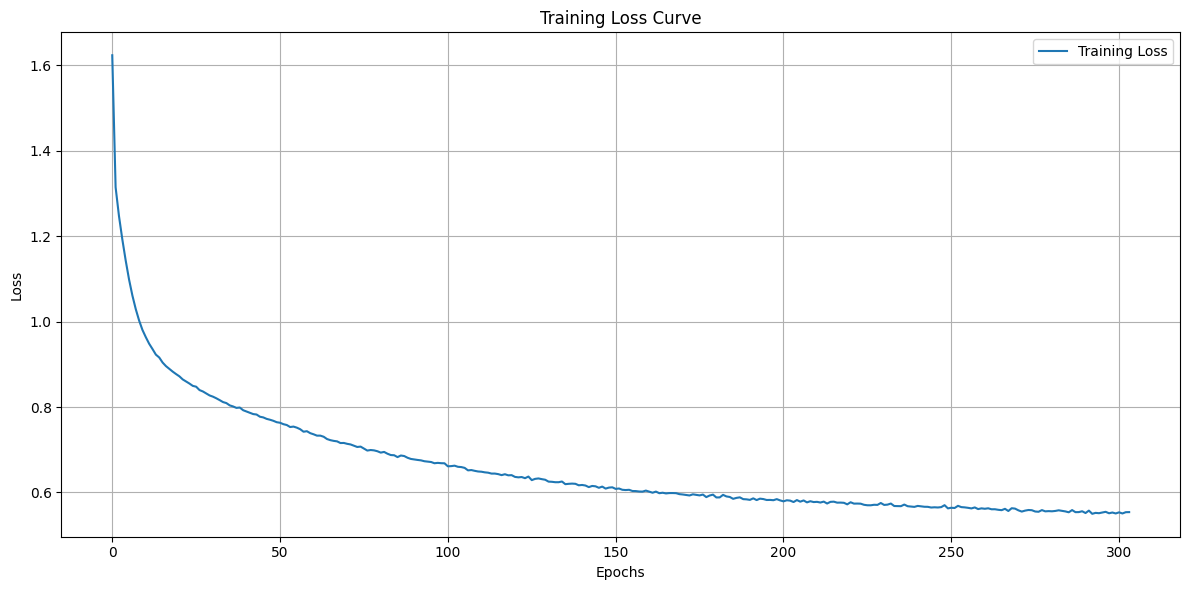

In [14]:

# Build the MLP model
model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
if len(np.unique(y)) > 2:  # Multi-class classification
    test_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
else:
    test_accuracy = accuracy_score(y_test, y_pred)

print(f'Test Accuracy: {test_accuracy}')
print(classification_report(y_test, y_pred))

# Plot training loss curve
plt.figure(figsize=(12, 6))
plt.plot(model.loss_curve_, label='Training Loss')
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Fit the model


Predicted classes: [1 1 1 2 1 1 2 2 1 1 2 1 1 1 0 0 1 1 1 1 1 3 1 1 1 1 1 2 3 1 1 1 2 1 2 1 1
 2 1 1 1 0 1 1 1 0 2 3 0 2 1 1 2 1 0 2 1 3 1 2 2 2 1 3 3 1 1 2 2 1 1 1 1 2
 1 1 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1]
True classes: [1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 0 2 1 1 1 1 3 1 3 1 1 1 2 3 1 1 3 2 1 3 1 1
 2 1 1 1 2 1 3 1 1 2 3 1 2 1 1 2 1 1 2 2 3 1 1 2 2 1 3 3 1 1 2 2 1 1 1 1 2
 1 1 0 2 1 1 1 1 1 1 1 1 1 1 2 1 3 1 1 1 2 1 1 1 1 1]
Accuracy: 0.85
Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.37      1.00      0.54       221
           1       0.86      0.93      0.89      3675
           2       0.93      0.75      0.83      2220
           3       0.92      0.73      0.81      1000

    accuracy                           0.85      7116
   macro avg       0.77      0.85      0.77      7116
weighted avg       0.88      0.85      0.85      7116



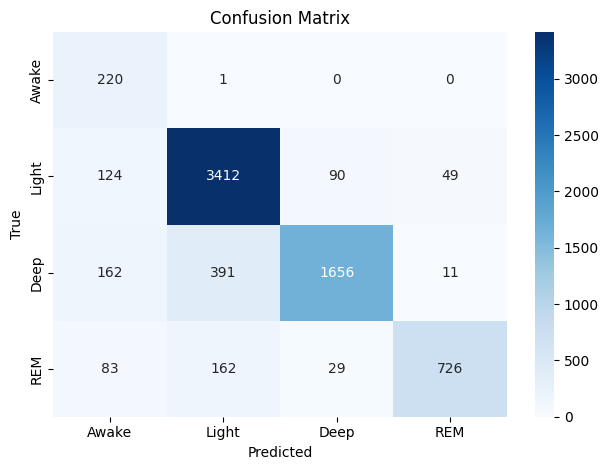

Unique classes in true_classes: [0 1 2 3]
Unique classes in predicted_classes: [0 1 2 3]


In [15]:

# Make predictions
predictions = model.predict(X_test)
# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)
# Convert true labels to class labels if needed
if len(y_test.shape) > 1:
    true_classes = np.argmax(y_test, axis=1)

# Print the first few predictions and true labels
print("Predicted classes:", predicted_classes[:100])
print("True classes:", true_classes[:100])

# Calculate accuracy
accuracy = np.mean(predicted_classes == true_classes)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the predictions
#Accuracy & Classification Report
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(true_classes, predicted_classes))

# plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Calculate confusion matrix
cm_ann = confusion_matrix(true_classes, predicted_classes)

# set labels for confusion matrix as class names # 0 for Awake, 1 for Light, 2 for Deep, 3 for REM
labels = ['Awake', 'Light', 'Deep', 'REM']  #

# Plot confusion matrix
plt.title('Confusion Matrix')
sns.heatmap(cm_ann, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# Check unique classes in true_classes
print("Unique classes in true_classes:", np.unique(true_classes))
# Check unique classes in predicted_classes
print("Unique classes in predicted_classes:", np.unique(predicted_classes))

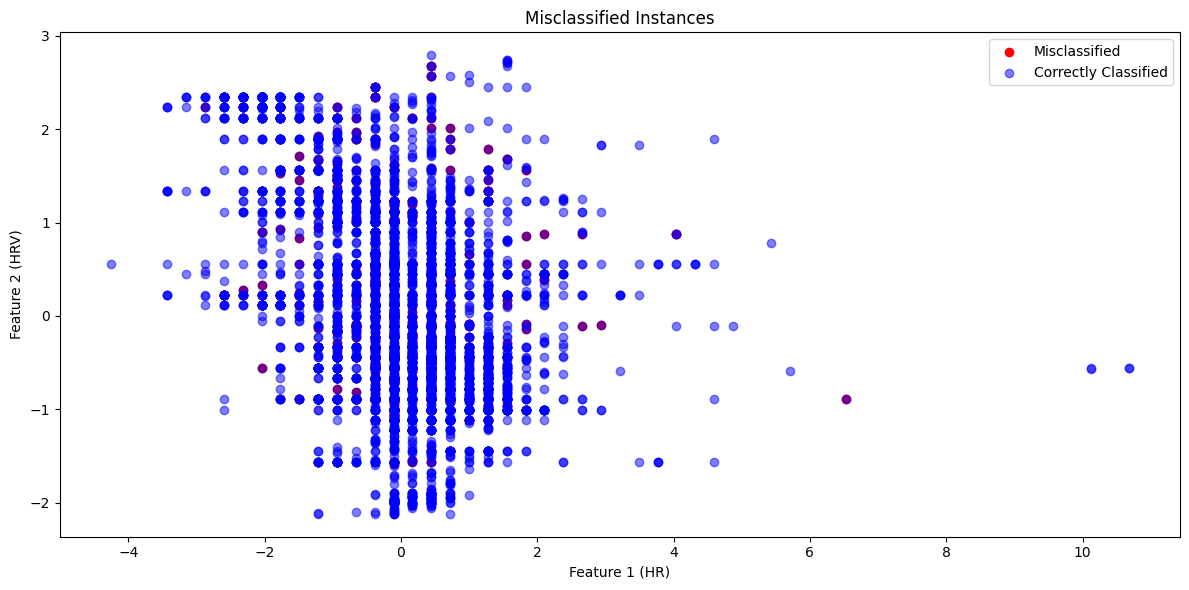

In [16]:
# Identify misclassified instances
misclassified_indices = np.where(predicted_classes != true_classes)[0]
# Visualize misclassified instances
plt.figure(figsize=(12, 6))
plt.scatter(X_test[misclassified_indices, 0], X_test[misclassified_indices, 1], c='red', label='Misclassified')
plt.scatter(X_test[:, 0], X_test[:, 1], c='blue', alpha=0.5, label='Correctly Classified')
plt.title('Misclassified Instances')
plt.xlabel('Feature 1 (HR)')
plt.ylabel('Feature 2 (HRV)')
plt.legend()
plt.tight_layout()
plt.show()




In [17]:
# Calculate the total number of misclassified instances
num_misclassified = len(misclassified_indices)

# Calculate the total number of test samples
total_test_samples = len(X_test)

# Calculate the proportion of misclassified instances
misclassification_rate = num_misclassified / total_test_samples

# Print the results
print(f"Total Misclassified Instances: {num_misclassified}")
print(f"Total Test Samples: {total_test_samples}")
print(f"Misclassification Rate: {misclassification_rate:.2%}")

Total Misclassified Instances: 1102
Total Test Samples: 7116
Misclassification Rate: 15.49%


# 2- Alternative model:
## Transformer for time series data


In [18]:
#  Import necessary libraries for PyTorch
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [19]:
#Load the data
df = pd.read_csv("Sleepdata-Extrapolated-Cleaned-Latest.csv")
# print head
(df.head())


,Time,HR,HRV,BR,sleep_level
0,37:33.2,50.0,63.0,14.29,0.0
1,37:33.7,50.0,63.0,14.29,0.0
2,37:34.2,50.0,63.0,14.29,0.0
3,37:34.7,50.0,63.0,14.29,0.0
4,37:35.2,50.0,63.0,14.29,0.0


In [20]:

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(df[['HR', 'HRV', 'BR']])
y = LabelEncoder().fit_transform(df['sleep_level'])

# Create sliding windows
def create_sequences(X, y, window_size=50):
    X_seq, y_seq = [], []
    for i in range(len(X) - window_size):
        X_seq.append(X[i:i+window_size])
        y_seq.append(y[i+window_size-1])  # predict based on the last step
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, window_size=50)

# Dataset and Dataloader
class SleepDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

dataset = SleepDataset(X_seq, y_seq)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

#  Transformer Model
class SleepTransformer(nn.Module):
    def __init__(self, input_dim=3, model_dim=64, num_heads=4, num_layers=2, num_classes=3, dropout=0.1, seq_len=50):
        super().__init__()
        self.input_proj = nn.Linear(input_dim, model_dim)
        self.positional_encoding = nn.Parameter(torch.randn(1, seq_len, model_dim))
        encoder_layer = nn.TransformerEncoderLayer(d_model=model_dim, nhead=num_heads, dropout=dropout)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(model_dim * seq_len, 128),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.input_proj(x)
        x = x + self.positional_encoding[:, :x.size(1)]
        x = x.permute(1, 0, 2)  # (seq_len, batch, dim)
        x = self.transformer(x)
        x = x.permute(1, 0, 2)
        return self.fc(x)


#  Train the Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SleepTransformer(num_classes=len(np.unique(y))).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

for epoch in range(20):
    model.train()
    total_loss = 0
    for X_batch, y_batch in loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        out = model(X_batch)
        loss = criterion(out, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}: Loss = {total_loss:.4f}")


c:\Users\sekuc\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1: Loss = 1340.8832
Epoch 2: Loss = 942.6186
Epoch 3: Loss = 788.9249
Epoch 4: Loss = 677.6287
Epoch 5: Loss = 602.0347
Epoch 6: Loss = 526.2027
Epoch 7: Loss = 491.4817
Epoch 8: Loss = 437.6736
Epoch 9: Loss = 401.8521
Epoch 10: Loss = 369.0269
Epoch 11: Loss = 357.7847
Epoch 12: Loss = 355.1383
Epoch 13: Loss = 312.7799
Epoch 14: Loss = 314.7953
Epoch 15: Loss = 282.8700
Epoch 16: Loss = 281.5312
Epoch 17: Loss = 266.1061
Epoch 18: Loss = 256.7223
Epoch 19: Loss = 246.1145
Epoch 20: Loss = 233.5312


# Validation and evaluation


In [21]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from torch.utils.data import random_split
import matplotlib.pyplot as plt
import seaborn as sns


# Train/Validation/tese Split

## Data splited to 80-10-10 train, validation and test

In [22]:
# 80% train, 10% validation, 10% test split

train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



# Validation and Accuracy Evaluation



Validation Accuracy: 0.9699

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       218
           1       0.97      0.98      0.97      3606
           2       0.97      0.95      0.96      2292
           3       0.98      0.98      0.98       994

    accuracy                           0.97      7110
   macro avg       0.97      0.97      0.97      7110
weighted avg       0.97      0.97      0.97      7110



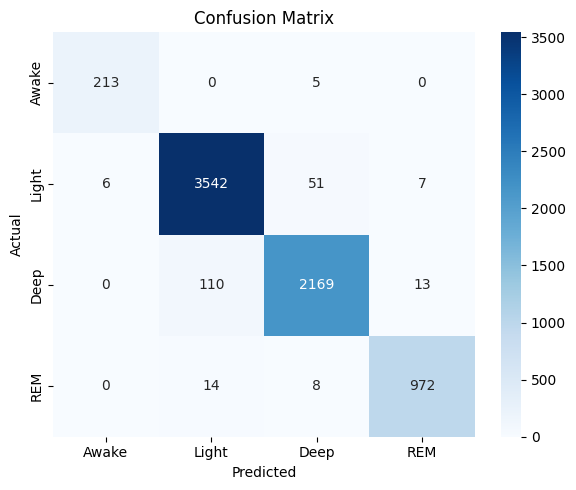

In [23]:
# Validate the Model
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for X_val, y_val in val_loader:
        X_val, y_val = X_val.to(device), y_val.to(device)
        outputs = model(X_val)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(y_val.cpu().numpy())

#Accuracy & Classification Report
acc = accuracy_score(all_labels, all_preds)
print(f"\nValidation Accuracy: {acc:.4f}")
print("\nClassification Report:\n", classification_report(all_labels, all_preds))

# Confusion Matrix
# Map label IDs to names
labels = ['Awake', 'Light', 'Deep', 'REM']  #
cm_Ann = confusion_matrix(all_labels, all_preds)


plt.figure(figsize=(6,5))
sns.heatmap(cm_Ann, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()



Test Accuracy: 0.9702

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       235
           1       0.97      0.98      0.97      3646
           2       0.97      0.94      0.96      2211
           3       0.99      0.99      0.99      1020

    accuracy                           0.97      7112
   macro avg       0.98      0.97      0.97      7112
weighted avg       0.97      0.97      0.97      7112



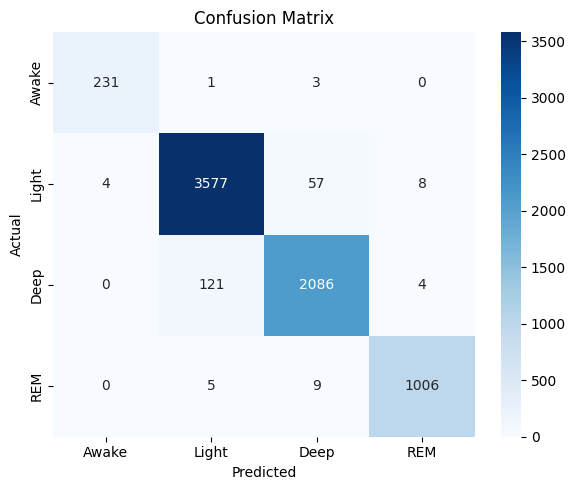

In [24]:
# test the Model
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for X_test, y_test in test_loader:
        X_test, y_test = X_test.to(device), y_test.to(device)
        outputs = model(X_test)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(y_test.cpu().numpy())
# Calculate accuracy
acc = accuracy_score(all_labels, all_preds)
print(f"\nTest Accuracy: {acc:.4f}")
# Classification Report
print("\nClassification Report:\n", classification_report(all_labels, all_preds))
# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
# Visualize the predictions


# Task
Develop a transformer model and deploy it on PyTorch mobile.

## Train the transformer model

### Subtask:
Train the Transformer model in PyTorch as you have done in the previous steps.


In [25]:
from torch.utils.data import random_split

# 80% train, 10% validation, 10% test split
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Instantiate the model
model = SleepTransformer(num_classes=len(np.unique(y))).to(device)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

# Train the model
epochs = 20
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        out = model(X_batch)
        loss = criterion(out, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}: Loss = {total_loss:.4f}")

Using device: cuda


c:\Users\sekuc\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/20: Loss = 1172.1511
Epoch 2/20: Loss = 824.5369
Epoch 3/20: Loss = 655.9503
Epoch 4/20: Loss = 555.5845
Epoch 5/20: Loss = 482.8251
Epoch 6/20: Loss = 422.3949
Epoch 7/20: Loss = 380.7456
Epoch 8/20: Loss = 355.5277
Epoch 9/20: Loss = 329.4536
Epoch 10/20: Loss = 313.8271
Epoch 11/20: Loss = 296.0582
Epoch 12/20: Loss = 274.0052
Epoch 13/20: Loss = 261.2709
Epoch 14/20: Loss = 237.7373
Epoch 15/20: Loss = 243.2456
Epoch 16/20: Loss = 220.5176
Epoch 17/20: Loss = 206.1531
Epoch 18/20: Loss = 211.7868
Epoch 19/20: Loss = 198.7127
Epoch 20/20: Loss = 194.4705


In [26]:
# save the trained Transformers Model
torch.save(model.state_dict(), 'transformer_model.pth')



Test Accuracy: 0.9684

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       223
           1       0.97      0.98      0.97      3613
           2       0.96      0.94      0.95      2253
           3       0.99      0.98      0.98      1023

    accuracy                           0.97      7112
   macro avg       0.97      0.97      0.97      7112
weighted avg       0.97      0.97      0.97      7112



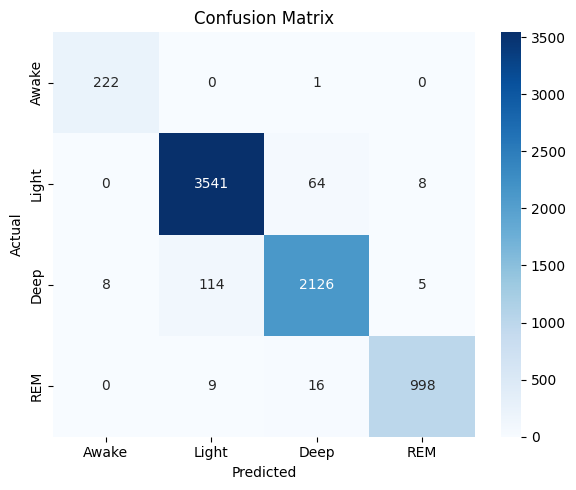

In [27]:
# prompt: evaluate and test the model accuracy

# Evaluate the model on the test set
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
  for X_test, y_test in test_loader:
    X_test, y_test = X_test.to(device), y_test.to(device)
    outputs = model(X_test)
    preds = torch.argmax(outputs, dim=1)
    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(y_test.cpu().numpy())

# Calculate accuracy
acc = accuracy_score(all_labels, all_preds)
print(f"\nTest Accuracy: {acc:.4f}")

# Classification Report
print("\nClassification Report:\n", classification_report(all_labels, all_preds))

# Confusion Matrix
cm_transformers= confusion_matrix(all_labels, all_preds)

# Map label IDs to names
labels = ['Awake', 'Light', 'Deep', 'REM'] # based on true labling


plt.figure(figsize=(6,5))
sns.heatmap(cm_transformers, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

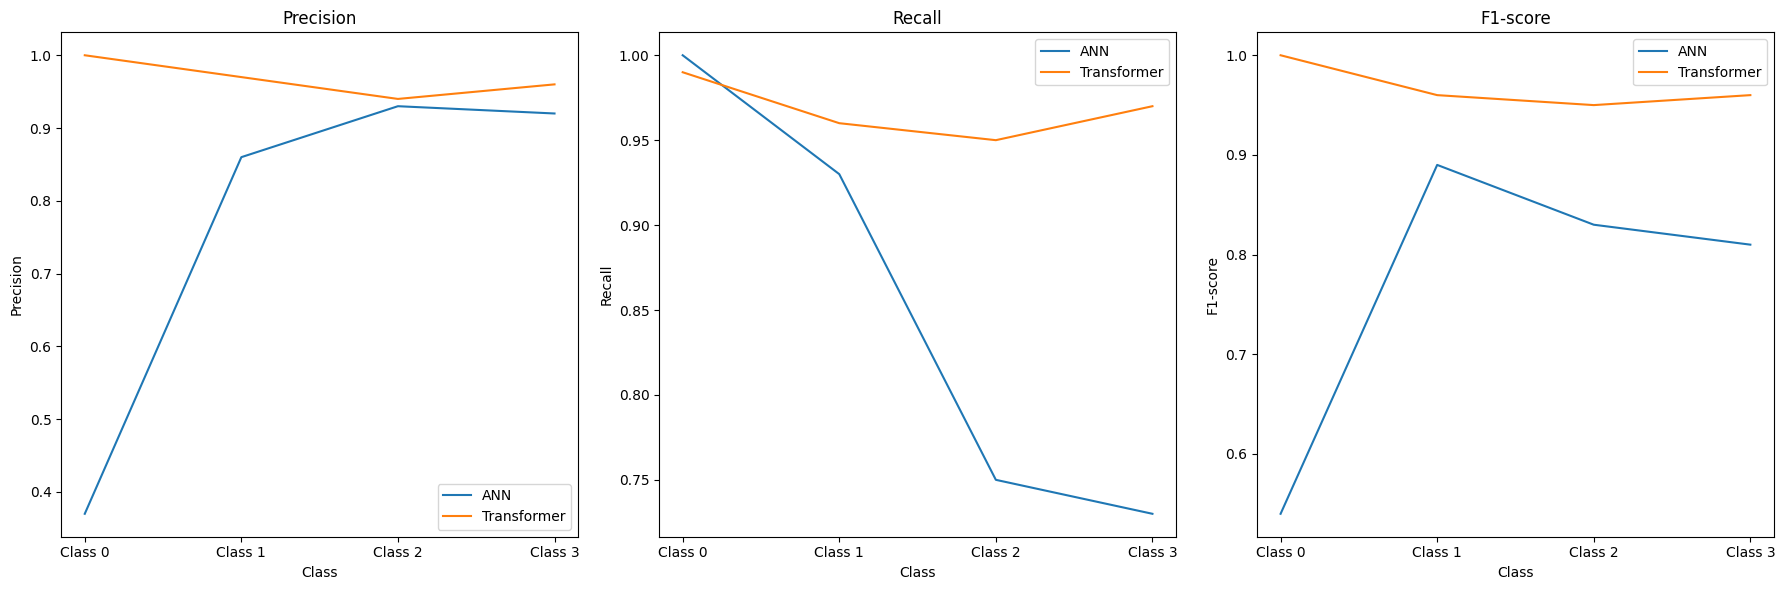

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Classification metrics for ANN and Transformer models
ann_metrics = {
    'precision': [0.37, 0.86, 0.93, 0.92],
    'recall': [1.00, 0.93, 0.75, 0.73],
    'f1-score': [0.54, 0.89, 0.83, 0.81]
}

transformer_metrics = {
    'precision': [1.00, 0.97, 0.94, 0.96],
    'recall': [0.99, 0.96, 0.95, 0.97],
    'f1-score': [1.00, 0.96, 0.95, 0.96]
}

classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

# Create subplots for precision, recall, and F1-score
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(['precision', 'recall', 'f1-score']):
    axs[i].plot(classes, ann_metrics[metric], label='ANN')
    axs[i].plot(classes, transformer_metrics[metric], label='Transformer')
    axs[i].set_title(metric.capitalize())
    axs[i].set_xlabel('Class')
    axs[i].set_ylabel(metric.capitalize())
    axs[i].legend()

plt.tight_layout()
plt.show()

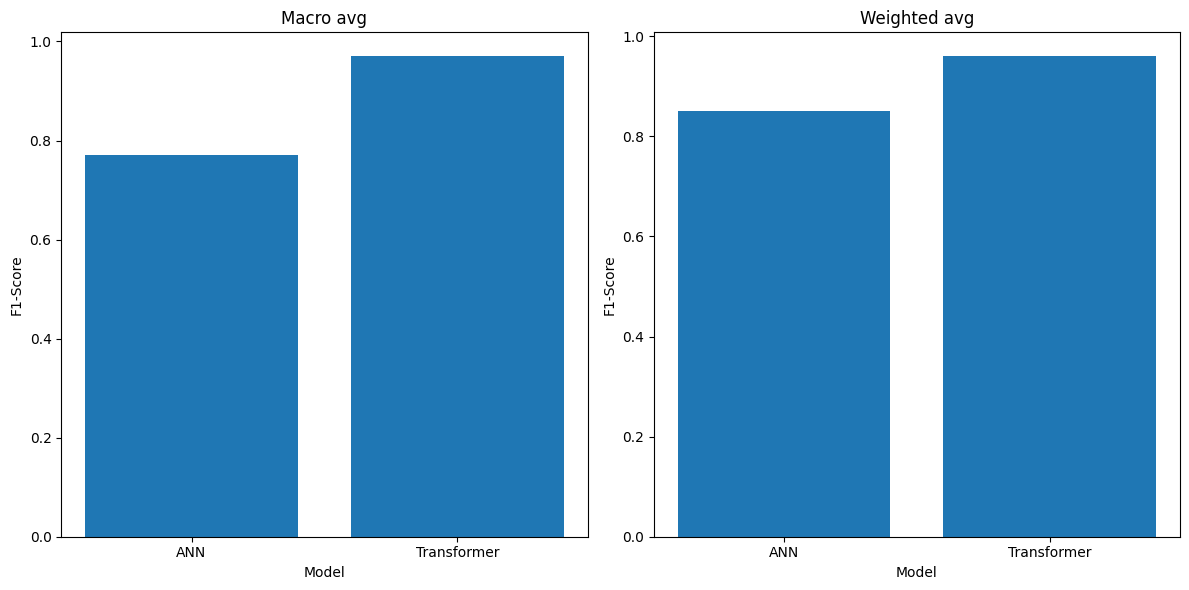

In [29]:
# Macro and weighted average values for ANN and Transformer models
ann_macro_avg = {'precision': 0.77, 'recall': 0.85, 'f1-score': 0.77}
transformer_macro_avg = {'precision': 0.97, 'recall': 0.97, 'f1-score': 0.97}

ann_weighted_avg = {'precision': 0.88, 'recall': 0.85, 'f1-score': 0.85}
transformer_weighted_avg = {'precision': 0.96, 'recall': 0.96, 'f1-score': 0.96}

# Create bar charts for macro and weighted averages
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for i, avg_type in enumerate(['macro avg', 'weighted avg']):
    ann_avg = ann_macro_avg if avg_type == 'macro avg' else ann_weighted_avg
    transformer_avg = transformer_macro_avg if avg_type == 'macro avg' else transformer_weighted_avg

    axs[i].bar(['ANN', 'Transformer'], [ann_avg['f1-score'], transformer_avg['f1-score']])
    axs[i].set_title(avg_type.capitalize())
    axs[i].set_xlabel('Model')
    axs[i].set_ylabel('F1-Score')

plt.tight_layout()
plt.show()


# MODEL 3 : LSTM

Epoch 1/20, Loss: 1353.7367, Validation Accuracy: 0.6935
Epoch 2/20, Loss: 1127.0688, Validation Accuracy: 0.6962
Epoch 3/20, Loss: 1071.6358, Validation Accuracy: 0.7245
Epoch 4/20, Loss: 1038.0924, Validation Accuracy: 0.7217
Epoch 5/20, Loss: 1009.3454, Validation Accuracy: 0.7420
Epoch 6/20, Loss: 979.2905, Validation Accuracy: 0.7418
Epoch 7/20, Loss: 952.3822, Validation Accuracy: 0.7511
Epoch 8/20, Loss: 927.9625, Validation Accuracy: 0.7582
Epoch 9/20, Loss: 908.3002, Validation Accuracy: 0.7588
Epoch 10/20, Loss: 889.9946, Validation Accuracy: 0.7666
Epoch 11/20, Loss: 872.9990, Validation Accuracy: 0.7740
Epoch 12/20, Loss: 857.9210, Validation Accuracy: 0.7736
Epoch 13/20, Loss: 844.8746, Validation Accuracy: 0.7727
Epoch 14/20, Loss: 833.6943, Validation Accuracy: 0.7781
Epoch 15/20, Loss: 820.7408, Validation Accuracy: 0.7780
Epoch 16/20, Loss: 811.9380, Validation Accuracy: 0.7820
Epoch 17/20, Loss: 803.3460, Validation Accuracy: 0.7838
Epoch 18/20, Loss: 791.7373, Valida

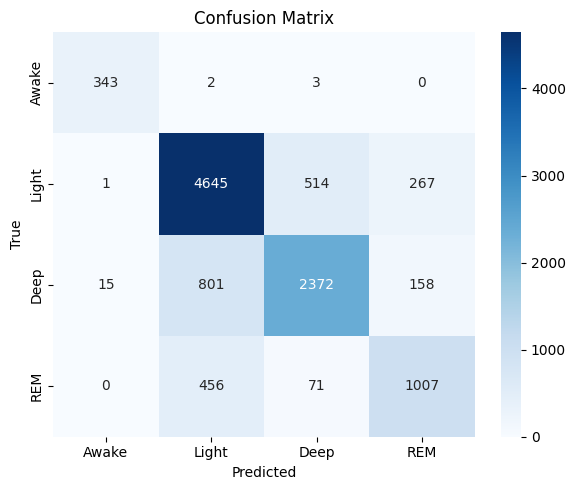

In [36]:


import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data
df = pd.read_csv("Sleepdata-Extrapolated-Cleaned-Latest.csv")

# Drop the time column
df = df.drop(columns=["Time"])

# Remove missing values if any
df.dropna(inplace=True)

# Define feature columns and target column
feature_cols = ["HR", "HRV", "BR"]
target_col = "sleep_level"

X = df[feature_cols].values
y = df[target_col].values.astype(int)

# 2. Split data into training, validation, and test sets (random split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 3. Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# 4. Create sequences for LSTM
def create_sequences(X, y, seq_len):
    Xs, ys = [], []
    for i in range(len(X) - seq_len + 1):
        Xs.append(X[i:i+seq_len])
        ys.append(y[i+seq_len-1])  # label of the last time step in sequence
    return np.array(Xs), np.array(ys)

seq_len = 20  # You can adjust this parameter

X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_len)
X_val_seq, y_val_seq = create_sequences(X_val, y_val, seq_len)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_len)

# 5. Convert to tensors
X_train_t = torch.tensor(X_train_seq, dtype=torch.float32)
y_train_t = torch.tensor(y_train_seq, dtype=torch.long)
X_val_t = torch.tensor(X_val_seq, dtype=torch.float32)
y_val_t = torch.tensor(y_val_seq, dtype=torch.long)
X_test_t = torch.tensor(X_test_seq, dtype=torch.float32)
y_test_t = torch.tensor(y_test_seq, dtype=torch.long)

# 6. Create DataLoaders
batch_size = 32
train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_t, y_val_t), batch_size=batch_size)
test_loader = DataLoader(TensorDataset(X_test_t, y_test_t), batch_size=batch_size)

# 7. Define LSTM model
class SleepLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SleepLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        _, (hn, _) = self.lstm(x)
        out = self.fc(hn[-1])
        return out

input_size = len(feature_cols)  # 3 features
hidden_size = 64
num_classes = len(np.unique(y))

model = SleepLSTM(input_size, hidden_size, num_classes)

# 8. Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 9. Training function
def train_model(model, train_loader, val_loader, epochs=10):
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        model.eval()
        val_correct = 0
        total_val = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                outputs = model(X_batch)
                _, predicted = torch.max(outputs.data, 1)
                val_correct += (predicted == y_batch).sum().item()
                total_val += y_batch.size(0)
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}, Validation Accuracy: {val_correct/total_val:.4f}")

# 10. Train the model
train_model(model, train_loader, val_loader, epochs=20)

# 11. Evaluate on test data
def evaluate_model(model, loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X_batch, y_batch in loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs.data, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())
    return all_labels, all_preds

y_true, y_pred = evaluate_model(model, test_loader)
print(classification_report(y_true, y_pred))

report_dict = classification_report(y_true, y_pred, output_dict=True)

# Convert to DataFrame for better readability
report_df = pd.DataFrame(report_dict).transpose()



cm_LSTM = confusion_matrix(y_true, y_pred)
labels = ['Awake', 'Light', 'Deep', 'REM']  # kendi class isimlerine göre güncelle

plt.figure(figsize=(6,5))
sns.heatmap(cm_LSTM, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


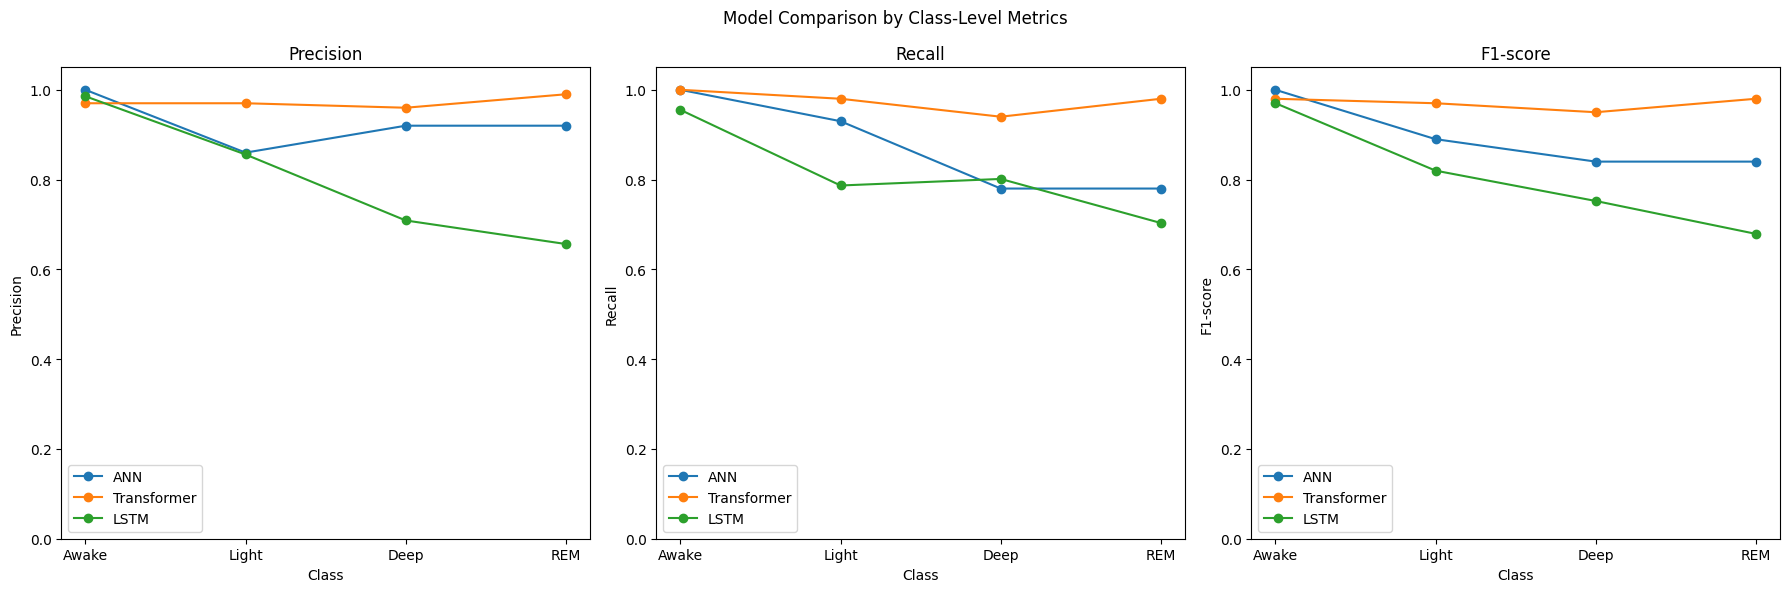

In [40]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt

# Metrics
ann_metrics = {
    'precision': [1.00, 0.86, 0.92, 0.92],
    'recall':    [1.00, 0.93, 0.78, 0.78],
    'f1-score':  [1.00, 0.89, 0.84, 0.84]
}

transformer_metrics = {
    'precision': [0.97, 0.97, 0.96, 0.99],
    'recall':    [1.00, 0.98, 0.94, 0.98],
    'f1-score':  [0.98, 0.97, 0.95, 0.98]
}

lstm_metrics = {
    'precision': [0.9856, 0.8559, 0.7089, 0.6564],
    'recall':    [0.9554, 0.7868, 0.8014, 0.7032],
    'f1-score':  [0.9703, 0.8199, 0.7523, 0.6790]
}

# Class names
classes = ['Awake', 'Light', 'Deep', 'REM']

# Graps of precision, recall, f1-score
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(['precision', 'recall', 'f1-score']):
    axs[i].plot(classes, ann_metrics[metric], label='ANN', marker='o')
    axs[i].plot(classes, transformer_metrics[metric], label='Transformer', marker='o')
    axs[i].plot(classes, lstm_metrics[metric], label='LSTM', marker='o')

    axs[i].set_title(metric.capitalize())
    axs[i].set_xlabel('Class')
    axs[i].set_ylabel(metric.capitalize())
    axs[i].set_ylim(0, 1.05)
    axs[i].legend()

plt.suptitle('Model Comparison by Class-Level Metrics')
plt.tight_layout()
plt.show()


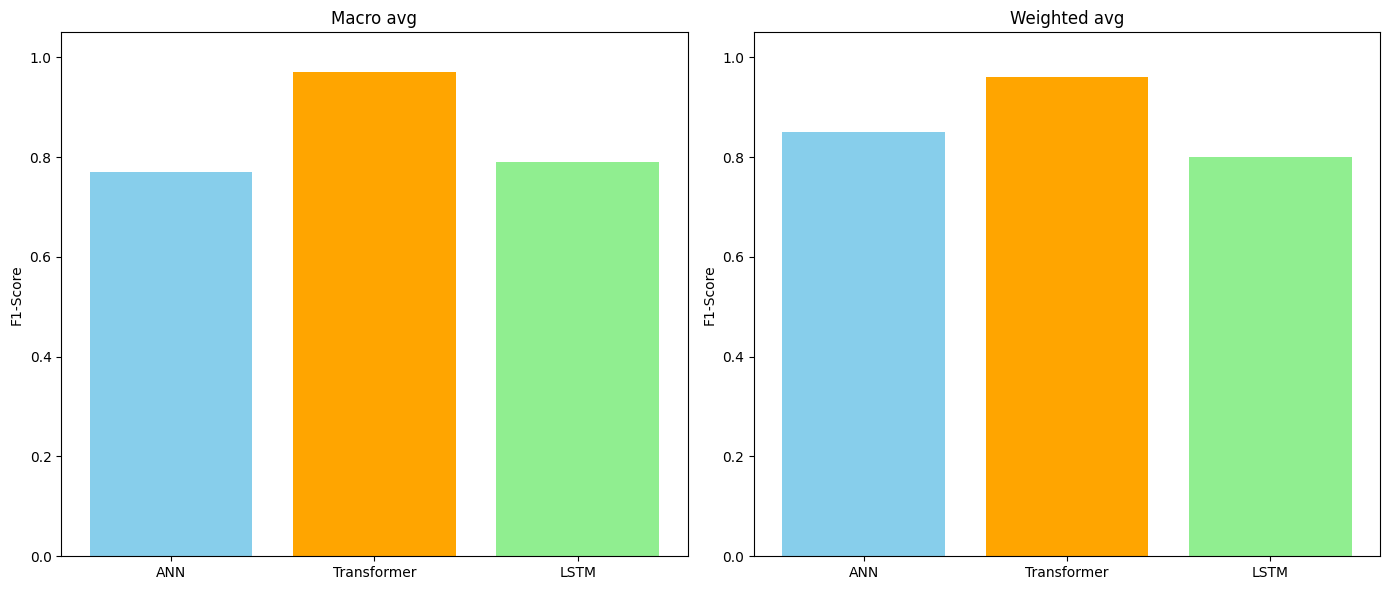

In [32]:
import matplotlib.pyplot as plt

# Macro and weighted average values
ann_macro_avg = {'precision': 0.77, 'recall': 0.85, 'f1-score': 0.77}
transformer_macro_avg = {'precision': 0.97, 'recall': 0.97, 'f1-score': 0.97}
lstm_macro_avg = {'precision': 0.82, 'recall': 0.77, 'f1-score': 0.79}  # senin LSTM sonucuna göre

ann_weighted_avg = {'precision': 0.88, 'recall': 0.85, 'f1-score': 0.85}
transformer_weighted_avg = {'precision': 0.96, 'recall': 0.96, 'f1-score': 0.96}
lstm_weighted_avg = {'precision': 0.81, 'recall': 0.80, 'f1-score': 0.80}  # senin LSTM sonucuna göre

# Create bar charts
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

for i, avg_type in enumerate(['macro avg', 'weighted avg']):
    if avg_type == 'macro avg':
        ann = ann_macro_avg['f1-score']
        transformer = transformer_macro_avg['f1-score']
        lstm = lstm_macro_avg['f1-score']
    else:
        ann = ann_weighted_avg['f1-score']
        transformer = transformer_weighted_avg['f1-score']
        lstm = lstm_weighted_avg['f1-score']
    
    axs[i].bar(['ANN', 'Transformer', 'LSTM'], [ann, transformer, lstm], color=['skyblue', 'orange', 'lightgreen'])
    axs[i].set_title(avg_type.capitalize())
    axs[i].set_ylabel('F1-Score')
    axs[i].set_ylim(0, 1.05)

plt.tight_layout()
plt.show()


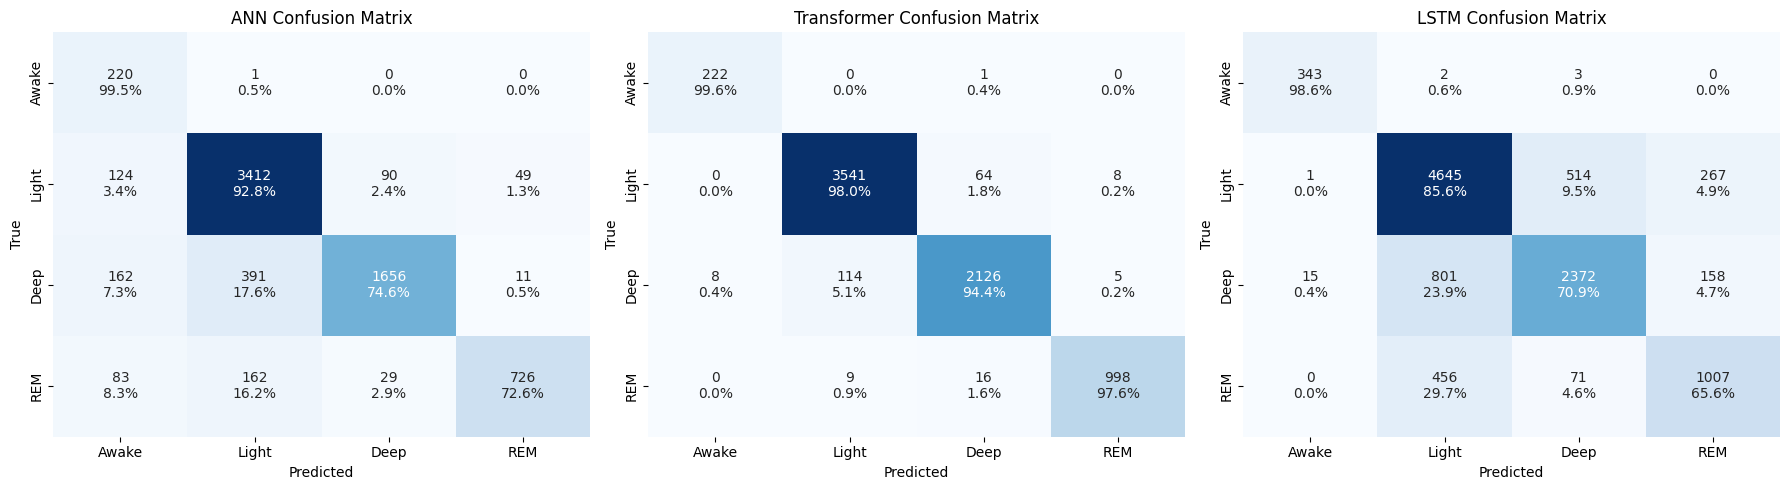

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Class labels
labels = ['Awake', 'Light', 'Deep', 'REM']


def format_annot(cm):
    percent = cm.astype('float') / cm.sum(axis=1, keepdims=True) * 100
    annot = np.empty_like(cm).astype(str)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            count = cm[i, j]
            pct = percent[i, j]
            annot[i, j] = f"{count}\n{pct:.1f}%"
    return annot

# Plot
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for ax, cm, title in zip(
    axs,
    [cm_ann, cm_transformers, cm_LSTM],
    ['ANN', 'Transformer', 'LSTM']
):
    annot = format_annot(cm)
    sns.heatmap(cm, annot=annot, fmt="", cmap="Blues",
                xticklabels=labels, yticklabels=labels, ax=ax, cbar=False)
    ax.set_title(f'{title} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()
